In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
color_img = plt.imread('./Mona_Lisa.jpg')

Text(0, 0.5, 'y')

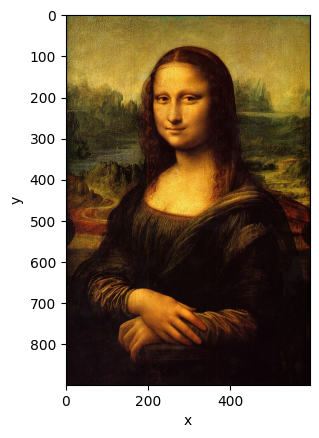

In [3]:
plt.imshow(color_img)
plt.gca().set_xlabel('x')
plt.gca().set_ylabel('y')

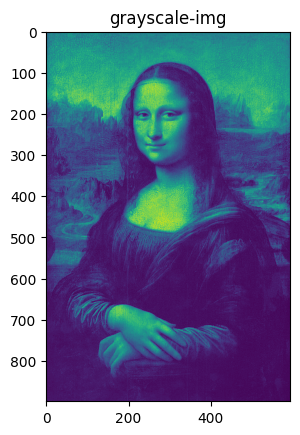

In [4]:
img = color_img[:,:,0]*0.2989 + color_img[:,:,1]*0.5870 + color_img[:,:,2]*0.1140
plt.title('grayscale-img')
plt.imshow(img)

In [5]:
print(img.shape)
print(img)

(899, 594)
[[60.7585 80.8983 84.2139 ... 79.8675 88.8388 89.7077]
 [64.7581 68.8995 86.9856 ... 90.8664 84.85   84.7082]
 [92.1144 76.2578 68.7594 ... 79.9384 74.851  73.3072]
 ...
 [18.8025 13.803  16.8027 ...  7.0317  3.2493  3.2493]
 [17.8026 13.803  16.8027 ...  8.0316  7.2489  7.2489]
 [17.8026 13.803  16.8027 ...  8.0316  7.2489  7.2489]]


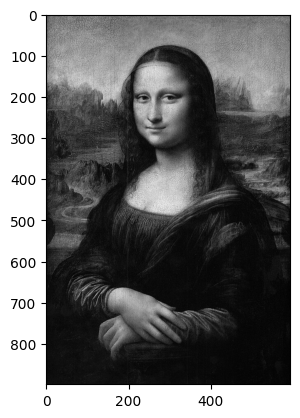

In [6]:
plt.imshow(img, cmap='gray')

In [7]:
correlation_coefficients_r = np.zeros(21)
correlation_coefficients_g = np.zeros(21)
correlation_coefficients_b = np.zeros(21)
pixel_shifts = np.arange(-10,11)
print(pixel_shifts)

[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10]


In [8]:
print(color_img.shape)

(899, 594, 3)


In [9]:
def calculate_correlation(original, shifted):
    correlations = []
    for c in range(original.shape[2]):
        orig_channel = original[:, :, c].flatten()
        shifted_channel = shifted[:, :, c].flatten()
        corr_matrix = np.corrcoef(orig_channel, shifted_channel)
        corr = corr_matrix[0,1]
        correlations.append(corr)
    return correlations

In [10]:
for dx in pixel_shifts:
    img_new = np.empty(color_img.shape)
    
    for y in range(0,color_img.shape[0]):
        for x in range(0,color_img.shape[1]):
            if(((dx<0)and(x>=color_img.shape[1]+dx))or((dx>0)and(x<dx))):
                for c in range(color_img.shape[2]):
                    img_new[y,x,c]=0
                continue
            for c in range(color_img.shape[2]):
                img_new[y,x,c] = color_img[y,x-dx,c]
    correlations = calculate_correlation(color_img, img_new)
    correlation_coefficients_r[dx+10] = correlations[0]
    correlation_coefficients_g[dx+10] = correlations[1]
    correlation_coefficients_b[dx+10] = correlations[2]


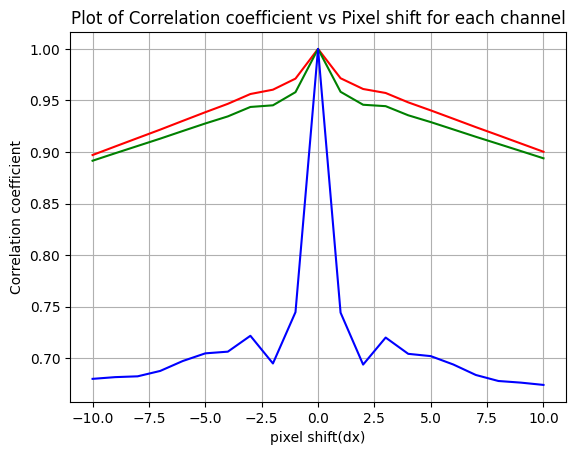

In [11]:
plt.plot(pixel_shifts, correlation_coefficients_r, label = 'Red Channel', color = 'red')
plt.plot(pixel_shifts, correlation_coefficients_g, label = 'Green Channel', color = 'green')
plt.plot(pixel_shifts, correlation_coefficients_b, label = 'Blue Channel', color = 'blue')

plt.title("Plot of Correlation coefficient vs Pixel shift for each channel")
plt.xlabel("pixel shift(dx)")
plt.ylabel("Correlation coefficient")

plt.grid(True)
plt.show()

In [12]:
num_bins = 256
bins = np.arange(0,num_bins)
hist_r = np.zeros(num_bins, dtype=int)
hist_g = np.zeros(num_bins, dtype=int)
hist_b = np.zeros(num_bins, dtype=int)

r_channel = color_img[:, :, 0].flatten()
g_channel = color_img[:, :, 1].flatten()
b_channel = color_img[:, :, 2].flatten()

for pixel_value in r_channel:
    hist_r[int(pixel_value)] += 1
for pixel_value in g_channel:
    hist_g[int(pixel_value)] += 1
for pixel_value in b_channel:
    hist_b[int(pixel_value)] += 1

pixel_count = color_img.shape[0]*color_img.shape[1]

normalized_hist_r = hist_r / pixel_count
normalized_hist_g = hist_g / pixel_count
normalized_hist_b = hist_b / pixel_count

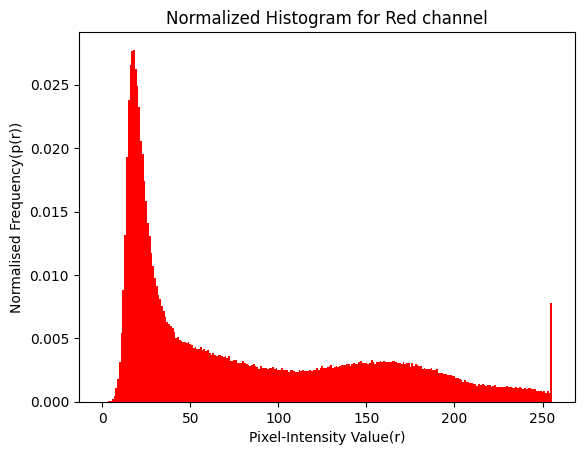

In [13]:
plt.bar(bins, normalized_hist_r, color='red', width=1.0)

plt.title('Normalized Histogram for Red channel')
plt.xlabel('Pixel-Intensity Value(r)')
plt.ylabel('Normalised Frequency(p(r))')
plt.show()


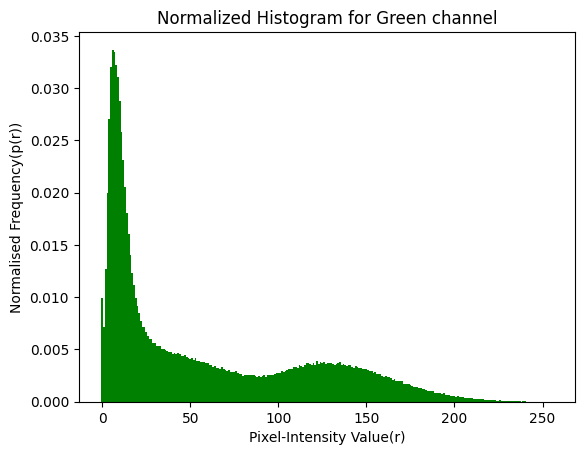

In [14]:
plt.bar(bins, normalized_hist_g, color='green', width=1.0)

plt.title('Normalized Histogram for Green channel')
plt.xlabel('Pixel-Intensity Value(r)')
plt.ylabel('Normalised Frequency(p(r))')
plt.show()

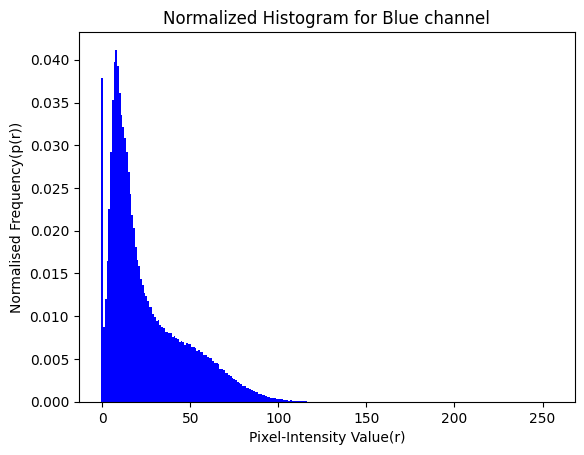

In [15]:
plt.bar(bins, normalized_hist_b, color='blue', width=1.0)

plt.title('Normalized Histogram for Blue channel')
plt.xlabel('Pixel-Intensity Value(r)')
plt.ylabel('Normalised Frequency(p(r))')
plt.show()